## Gather

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
%matplotlib inline

#### The tweet image predictions

In [190]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image_predictions.tsv', 'wb') as file:
    file.write(requests.get(url).content)

In [191]:
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### The WeRateDogs Twitter archive

In [192]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### tweet_json from twitter API

In [11]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)



1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 7983

Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 7597

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442:

Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716:

Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

In [193]:
import json
selected_cols = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        selected_cols.append({'tweet_id': data['id'],
                    'favorites': data['favorite_count'],
                    'retweets': data['retweet_count']})
tweet = pd.DataFrame(selected_cols, columns=['tweet_id','favorites','retweets'])

In [194]:
tweet.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assess

#### Visually

In [195]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [196]:
twitter_archive.head()
# Some columns have a lot of NaN
# Some column names are not clear in terms of what they represent
# floofer,doggo, puppo,and pupper should be variables instead of column names
# df_pred and df_tweet contain urls, 
# I should check if they provide the same information

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [197]:
tweet.head()

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [198]:
# The three tables are based on the same tweet_id column, 
# they could be combined to a single table. 

## Clean and assess(programatically)

In [199]:
df_pred = image_prediction.copy()
df_tweet = twitter_archive.copy()
basic_tweet = tweet.copy()

### Completeness

In [200]:
print(df_tweet.shape)

(2356, 17)


In [201]:
df_tweet.isnull().sum() # some of the columns are almost compltely missing and are not useful
# the expanded_urls has only 59 missing values, maybe I can try to fix it

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [202]:
df_tweet['expanded_urls']# take a look at this expanded_urls column

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

In [203]:
df_tweet.expanded_urls[0][-27:]

'/892420643555336193/photo/1'

In [204]:
df_tweet.tweet_id[0]
#The pattern seems to be https://twitter.com/dog_rates/status/ + tweet_id + /photo/1
# so I can fill in the missing value with this pattern

892420643555336193

#### `df_tweet`: 59 missing values in `expanded_urls` column

##### Define
Fill in the missing values with the pattern: https://twitter.com/dog_rates/status/ + `tweet_id` + /photo/1

##### Code

In [205]:
def fill_in_urls(row):
    if pd.isnull(row['expanded_urls']):
        row['expanded_urls']= 'https://twitter.com/dog_rates/status/'+str(row['tweet_id'])+'/photo/1'
    else:
        row['expanded_urls']= row['expanded_urls']
    return row['expanded_urls']

df_tweet['expanded_urls']=df_tweet.apply(lambda row: fill_in_urls(row),axis=1)

##### Test

In [206]:
df_tweet.expanded_urls[30], df_tweet.tweet_id[30]
# row30 was missing value, and now it has an url
# the number part of the url matches its id

('https://twitter.com/dog_rates/status/886267009285017600/photo/1',
 886267009285017600)

#### df_pred

In [207]:
df_pred.isnull().sum()# no missing value

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

#### basic_tweet

In [208]:
basic_tweet.isnull().sum()# no missing value

tweet_id     0
favorites    0
retweets     0
dtype: int64

***

### Tidiness

In [209]:
# doggo, floofer, pupper, puppo can be put into one column called dog_stage
df_tweet.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [210]:
len(df_tweet[(df_tweet.doggo=='None')&(df_tweet.floofer=='None')&
             (df_tweet.pupper=='None')&(df_tweet.puppo=='None')])
# in most of row, this dog stage is missing

1976

#### `df_tweet`: doggo, floofer, pupper, puppo should be the variables instead of column names

##### Define
Put doggo, floofer, pupper, puppo into one column called dog_stage

##### Code

In [211]:
# create a new column "dog_stage" and indicate which stage the dog is, including "doggo","floofer","pupper", or"puppo"
def dog_stage(row):
    if row['doggo']!='None':
        result=row['doggo']
    elif row['floofer']!='None':
        result=row['floofer']
    elif row['pupper']!='None':
        result=row['pupper']
    elif row['puppo']!='None':
        result=row['puppo']
    else:
        result= np.nan
    return result
df_tweet['dog_stage']=df_tweet.apply(lambda row:dog_stage(row),axis=1)

In [212]:
# the puppo column with non-None value does not equal to the new dog_stage column with the value "puppo"
(df_tweet[df_tweet.puppo!='None']['puppo']).equals(df_tweet[df_tweet.dog_stage=='puppo']['dog_stage'])

False

In [213]:
puppo=df_tweet[df_tweet.puppo!='None'].copy()
puppo.loc[puppo.dog_stage!='puppo']#Those two columns are not equal because of multiple stages.
# row191 is both doggo and puppo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,doggo


In [214]:
# give it a new category called multi_stages
df_tweet.loc[191,'dog_stage']='multi_stages'

In [215]:
df_tweet.loc[191,'dog_stage']

'multi_stages'

In [216]:
# the floofer column with non-None value does not equal to the new dog_stage column with the value "floofer"
(df_tweet[df_tweet.floofer!='None']['floofer']).equals(df_tweet[df_tweet.dog_stage=='floofer']['dog_stage'])

False

In [217]:
floofer=df_tweet[df_tweet.floofer!='None'].copy()
floofer.loc[floofer.dog_stage!='floofer']
# floofer has multiple stages too
# row200 is both doggo and floofer

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,doggo


In [218]:
# give it the same 'duplicated' value
df_tweet.loc[200,'dog_stage']='multi_stages'

In [219]:
df_tweet.loc[200,'dog_stage']

'multi_stages'

In [220]:
# the pupper column with non-None value does not equal to the new dog_stage column with the value "pupper"
(df_tweet[df_tweet.pupper!='None']['pupper']).equals(df_tweet[df_tweet.dog_stage=='pupper']['dog_stage'])

False

In [221]:
pupper=df_tweet[df_tweet.pupper!='None'].copy()
pupper_index=pupper.loc[pupper.dog_stage!='pupper'].index
df_tweet.loc[pupper_index,'dog_stage']='multi_stages'
# pupper has many rows of duplication, I give them the value "duplicated" too since they are both pupper and doggo

In [222]:
# look fine when examined manually
df_tweet.loc[df_tweet.dog_stage=='multi_stages']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,multi_stages
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,multi_stages
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,multi_stages
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None,multi_stages
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None,multi_stages
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,multi_stages
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,multi_stages
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,multi_stages
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None,multi_stages
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None,multi_stages


In [223]:
len(df_tweet.loc[df_tweet.dog_stage=='multi_stages'])

14

In [224]:
# it should be False because doggo column should match "doggo" plus "duplicated" in dog_stage column
(df_tweet[df_tweet.doggo!='None']['doggo']).equals(df_tweet[df_tweet.dog_stage=='doggo']['dog_stage'])

False

In [225]:
df_tweet.drop(columns=['doggo','floofer','puppo','pupper'],inplace=True)

##### Test

In [226]:
# At first, df_tweet has 17 columns, I created a dog_stage column and drop 4 columns. The number of columns matches 17+1-4=14
df_tweet.shape

(2356, 14)

In [227]:
df_tweet.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1158,724049859469295616,NaN,NaN,2016-04-24 01:38:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreggory. He just took a look at his s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724049859...,10,10,Kreggory,NaN
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,pupper
997,748324050481647620,NaN,NaN,2016-06-30 01:15:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He permanently looks like he jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748324050...,11,10,Duke,NaN
1671,682393905736888321,NaN,NaN,2015-12-31 02:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682393905...,11,10,Kreg,NaN
1199,716791146589110272,NaN,NaN,2016-04-04 00:55:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jennifur. She's supposed to be navigating...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716791146...,11,10,Jennifur,NaN
806,772102971039580160,NaN,NaN,2016-09-03 16:04:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's an OU cheerleader. About ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772102971...,11,10,Penny,NaN
1166,722613351520608256,NaN,NaN,2016-04-20 02:30:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Schnitzel. He's a Tropicana Floofboop. Ge...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722613351...,12,10,Schnitzel,NaN
1649,683742671509258241,NaN,NaN,2016-01-03 20:12:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sebastian. He's a womanizer. Romantic af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683742671...,11,10,Sebastian,NaN
1535,689977555533848577,NaN,NaN,2016-01-21 01:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a pup wearing a beret. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689977555...,12,10,None,NaN
361,829501995190984704,NaN,NaN,2017-02-09 01:27:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leo. He was a skater pup. She said see...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829501995...,12,10,Leo,NaN


***

In [228]:
df_tweet.text.iloc[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

#### `df_tweet`:  text column contain multiple information

##### Define
Remove urls at the end of this column

##### Code

In [229]:
# there are text and url in text column while I only want the text, so I'll remove the urls
df_tweet['text'] = df_tweet.text.str.rsplit(n=1, expand=True)[0]

##### Test

In [230]:
df_tweet['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

***

#### The three tables can be one

In [231]:
df_pred.shape, df_tweet.shape, basic_tweet.shape
# de_pred has less rows than the other two

((2075, 12), (2356, 14), (2354, 3))

##### Define
Combine the three tables using merge function

##### Code

In [232]:
df = pd.merge(df_tweet, basic_tweet, on='tweet_id', how='outer')

In [233]:
df = pd.merge(df,df_pred, on='tweet_id',how='outer')

In [234]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
dog_stage                     1976
favorites                        2
retweets                         2
jpg_url                        281
img_num                        281
p1                             281
p1_conf                        281
p1_dog                         281
p2                             281
p2_conf                        281
p2_dog                         281
p3                             281
p3_conf                        281
p3_dog                         281
dtype: int64

In [235]:
# 'in_reply_to_status_id', 'in_reply_to_user_id' have many missing value and 
# they don't seem to be important in terms of analysis, so I'll get rid of them to make to dataframe
# looks cleaner
df.drop(columns=['in_reply_to_status_id','in_reply_to_user_id'],inplace=True)

##### Test

In [236]:
df.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [237]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'favorites', 'retweets', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

***

### Quality

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2356 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  dog_stage                   380 non-null    object 
 12  favorites                   2354 non-null   float64
 13  retweets                    2354 

#### tweet_id should be string
#### tiemstamp should be timestamp
#### dog_stage could be categorical
#### favorites should be integer without decimal
#### retweets should be integer without decimal
#### p1/p1_dog/p2/p2_dog/p3/p3_dog could be categorical

##### Define
Use astype to convert those data type 

##### Code

In [239]:
df[['dog_stage','p1','p1_dog','p2','p2_dog','p3','p3_dog']]=df[['dog_stage','p1','p1_dog','p2','p2_dog','p3','p3_dog']].astype('category')

In [240]:
df['tweet_id']=df['tweet_id'].astype(str)
df[['favorites','retweets']]=df[['favorites','retweets']].fillna(0.0).astype(int)

In [241]:
df['timestamp']=pd.to_datetime(df['timestamp'])

##### Test

In [242]:
df.info()# re-check data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   timestamp                   2356 non-null   datetime64[ns, UTC]
 2   source                      2356 non-null   object             
 3   text                        2356 non-null   object             
 4   retweeted_status_id         181 non-null    float64            
 5   retweeted_status_user_id    181 non-null    float64            
 6   retweeted_status_timestamp  181 non-null    object             
 7   expanded_urls               2356 non-null   object             
 8   rating_numerator            2356 non-null   int64              
 9   rating_denominator          2356 non-null   int64              
 10  name                        2356 non-null   object          

***

In [243]:
df.rating_denominator.value_counts()
# I don't understand how this rating system works, however a denominator of 0 doesn't make sense

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

#### There is a 0 in the denominator column

##### Define
Remove theis row with 0 in denominator column

##### Code

In [244]:
df.iloc[np.where(df.rating_denominator==0)]
# the numerator is pretty extreme too, I guess it wanted to show something like an infinite rating, 
# however, if I want to analyze it based on math, it won't work. So I'll drop this row

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835246439...,960,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [245]:
df.drop(index=np.where(df.rating_denominator==0)[0],inplace=True)

##### Test

In [246]:
df.shape

(2355, 25)

***

#### Retweets are not needed

##### Define
Preserve only rows that have NaN in "retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp" columns

##### Code

In [247]:
# retweets are not wanted, so I'll remove them
# make sure all the rows with NaN in "retweeted_status_id",
# "retweeted_status_user_id", and "retweeted_status_timestamp" are the same
np.all(df[~df.retweeted_status_id.isnull()].index)==np.all(df[~df.retweeted_status_user_id.isnull()].index)

True

In [248]:
np.all(df[~df.retweeted_status_id.isnull()].index)==np.all(df[~df.retweeted_status_timestamp.isnull()].index)
# it looks like rows with values in "retweeted_status_id","retweeted_status_user_id","df.retweeted_status_timestamp"
# represent retweet instead of original ones, so I'll drop them

True

In [249]:
retweet_index=df[~df.retweeted_status_id.isnull()].index
df.drop(index=retweet_index,inplace=True)

In [250]:
df.shape

(2174, 25)

In [251]:
df.retweeted_status_id.isnull().sum(),df.retweeted_status_user_id.isnull().sum(),df.retweeted_status_timestamp.isnull().sum()
# now that all variables in these three columns are NaN, I'll drop all these columns

(2174, 2174, 2174)

In [252]:
df.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

##### Test

In [253]:
df.shape

(2174, 22)

***

#### Text start with "RT" are also retweets

##### Define
Remove rows begin with "RT" in the text column

##### Code

In [254]:
df[df.text.str.contains(pat='^RT.+')]['text']
# there are two rows with text columns start with RT, they are probably retweet, so remove them as well

1286    RT if you are as ready for summer as this pup ...
1860    RT until we find this dog. Clearly a cool dog ...
Name: text, dtype: object

In [255]:
RT_index=df[df.text.str.contains(pat='^RT.+')].index
df.drop(index=RT_index,inplace=True)

##### Test

In [256]:
df[df.text.str.contains(pat='^RT.+')]['text']

Series([], Name: text, dtype: object)

***

In [257]:
df.name.value_counts()

None       677
a           55
Charlie     11
Lucy        11
Oliver      10
          ... 
Duddles      1
Sephie       1
Teddy        1
Brownie      1
Ember        1
Name: name, Length: 956, dtype: int64

#### "a" in name column

##### Define
Replace "a" with "None"

##### Code

In [258]:
df[df.name=='a'].iloc[0]['text']

'Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow)'

In [259]:
df[df.name=='a'].iloc[1]['text']
# it looks like rows with "a" in the name column is simply 
# because names were not provided, I'll chage them to 'None'

'Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest'

In [260]:
df['name']=df['name'].str.replace('^a','None')

##### Test

In [261]:
df.name.value_counts()
#677+55=732, all the "a" have become None
#this column actually have some other "names" that do not look like names, but I am not planning to analyze dog names, 
# I'll just leave them as they are.

None       732
Lucy        11
Charlie     11
Oliver      10
Cooper      10
          ... 
Duddles      1
Sephie       1
Teddy        1
Brownie      1
Mya          1
Name: name, Length: 955, dtype: int64

***

#### Source column doesn't seem to provide any useful information for analysis

##### Define
Drop source column

##### Code

In [262]:
df.drop(labels='source',axis=1, inplace=True)

##### Test

In [263]:
df.shape

(2172, 21)

***

In [264]:
df.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'favorites', 'retweets',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [265]:
df.loc[2355,'expanded_urls']

'https://twitter.com/dog_rates/status/666020888022790149/photo/1'

In [266]:
df.loc[2355,'jpg_url']
# expended_url direct to twitter site and jpg_url to a jpg photo, however, the two photos are basically the same.
# jpg_url is probably a backup for expanded_url.

'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg'

In [267]:
df[~df['expanded_urls'].str.contains(pat='https://twitter.com/')]
# some expanded_urls do not direct to twitter site

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
335,832645525019123713,2017-02-17 17:38:57+00:00,There's going to be a dog terminal at JFK Airp...,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,NaN,3195,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
444,819238181065359361,2017-01-11 17:42:57+00:00,Some happy pupper news to share. 10/10 for eve...,http://us.blastingnews.com/news/2017/01/200-do...,10,10,None,pupper,2550,462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,808344865868283904,2016-12-12 16:16:49+00:00,This is Seamus. He's very bad at entering pool...,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,NaN,47281,24069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
562,802600418706604034,2016-11-26 19:50:26+00:00,This is Bailey. She has mastered the head tilt...,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,NaN,7938,1714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,791774931465953280,2016-10-27 22:53:48+00:00,Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,NaN,37818,21156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,676916996760600576,2015-12-16 00:09:23+00:00,Super speedy pupper. Does not go gentle into t...,https://vine.co/v/imJ0BdZOJTw,10,10,None,pupper,3231,2002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,676593408224403456,2015-12-15 02:43:33+00:00,This pupper loves leaves. 11/10 for committed ...,https://vine.co/v/eEQQaPFbgOY,11,10,None,pupper,4954,2410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,676121918416756736,2015-12-13 19:30:01+00:00,Here we are witnessing a very excited dog. Cle...,https://vine.co/v/iZXg7VpeDAv,8,10,None,NaN,2335,1297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916,674307341513269249,2015-12-08 19:19:32+00:00,This is life-changing. 12/10,https://vine.co/v/i7nWzrenw5h,12,10,life,NaN,12129,7641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
urls=df[~df.expanded_urls.str.contains(pat='https://twitter.com/')][['expanded_urls','jpg_url']].copy()

In [269]:
urls.isnull().sum()
# in those rows with non-twitter expanded_urls, none of them has jpg_url.
# I can say that this column is coupled with twitter site with photo or NaN when expanded_urls are not twitter site
# I'll discard this column since it is a duplicate url column

expanded_urls     0
jpg_url          93
dtype: int64

#### jpg_url has photo that's a duplicate to expanded_urls

##### Define
Remove jpg_url column

##### Code

In [270]:
df.drop(labels='jpg_url',axis=1, inplace=True)

##### Test

In [271]:
df.shape

(2172, 20)

***

In [272]:
df[df.duplicated(subset='expanded_urls',keep=False)]
# these two posts referred to the same dog, I'll drop one of them.

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
657,791774931465953280,2016-10-27 22:53:48+00:00,Vine will be deeply missed. This was by far my...,https://vine.co/v/ea0OwvPTx9l,14,10,None,NaN,37818,21156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2212,668587383441514497,2015-11-23 00:30:28+00:00,Never forget this vine. You will not stop watc...,https://vine.co/v/ea0OwvPTx9l,13,10,the,NaN,1760,1174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 657 and 2212 has the same dog photo and name

##### Define
Drop one of these two rows

##### Code

In [273]:
df.drop(index=657,axis=0, inplace=True)

##### Test

In [274]:
df.shape

(2171, 20)

***

#### I tried to find if the rating in the text column matches rating_denominator and rating_numerator columns. It turned out that they are all correct. So I did not do any changes here. Below are what I did

In [275]:
numerator_denominator = df.text.str.extract(r'(\d{1,4})\/(\d{1,4})',expand=True)

In [276]:
rating = df[['rating_denominator','rating_numerator','text']].copy()
rating = pd.concat([rating,numerator_denominator], axis=1)
rating.rename(columns={0:'numerator',1:'denominator'},inplace=True)
rating

,rating_denominator,rating_numerator,text,numerator,denominator
0,10,13,This is Phineas. He's a mystical boy. Only eve...,13,10
1,10,13,This is Tilly. She's just checking pup on you....,13,10
2,10,12,This is Archie. He is a rare Norwegian Pouncin...,12,10
3,10,13,This is Darla. She commenced a snooze mid meal...,13,10
4,10,12,This is Franklin. He would like you to stop ca...,12,10
...,...,...,...,...,...
2351,10,5,Here we have a 1949 1st generation vulpix. Enj...,5,10
2352,10,6,This is a purebred Piers Morgan. Loves to Netf...,6,10
2353,10,9,Here is a very happy pup. Big fan of well-main...,9,10
2354,10,7,This is a western brown Mitsubishi terrier. Up...,7,10


In [277]:
rating.denominator.isnull().sum()

17

In [278]:
rating.numerator.isnull().sum()

17

In [279]:
np.all(rating.denominator.isnull().sum()==rating.numerator.isnull().sum())
# there are 17 rows I did not catch their rating from the text

True

In [280]:
for i,k in enumerate((rating[rating.numerator.isnull()]).text):
    text=(rating[rating.numerator.isnull()]).text.iloc[i]
    print(i, text)
# take a look that all those 17 rows of text
# all of them don't contain rating information

0 @Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards
1 @Marc_IRL pixelated af
2 @xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their
3 @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through.
4 .@breaannanicolee PUPDATE: Cannon has a heart on his nose. Pupgraded to a
5 @markhoppus
6 @bragg6of8 @Andy_Pace_ we are still looking for the first
7 @docmisterio account started on
8 @UNC can confirm
9 @HistoryInPics
10 I've been informed by multiple sources that this is actually a dog elf who's tired from helping Santa all night. Pupgraded to
11 PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to
12 @TheEllenShow I'm not sure if you know this but that doggo right th

In [281]:
rating = rating.loc[~rating.numerator.isnull(),:]

In [282]:
rating[['numerator','denominator']]=rating[['numerator','denominator']].astype('int64')

D:\Udemy\envs\my_env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [283]:
np.all(rating.numerator==rating.rating_numerator)

True

In [284]:
# except for 17 rows of text without rating information,
# all other rating information in the text column and in the rating_numerator, rating_denomiator match each other 

## Save the dataframe

In [285]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analysis

### Rating characteristics

In [286]:
# find the outliers
rating = df.rating_numerator/df.rating_denominator
upper=rating.quantile(0.75)
lower=rating.quantile(0.25)
IQR=upper-lower
boundary=upper+1.5*IQR
boundary

1.5

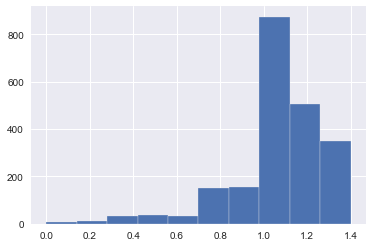

In [287]:
# plot the rating without outliers
rating.iloc[np.where(rating<1.5)].hist();

In [288]:
# 11 data points are outliers
rating.loc[rating>=1.5]

55        1.700000
188      42.000000
189      66.600000
290      18.200000
291       1.500000
516       3.428571
695       7.500000
763       2.700000
979     177.600000
1712      2.600000
2074     42.000000
dtype: float64

In [289]:
# the ratio of numerator greater than denominator
rating_greater_than_one=(rating>1).sum()/len(rating)

In [290]:
rating_not_greater_than_one=(rating<=1).sum()/len(rating)

In [291]:
rating_greater_than_one, rating_not_greater_than_one

(0.5964993090741594, 0.4035006909258406)

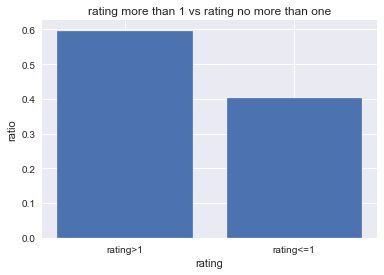

In [292]:
# plot and compare these two ratios
locations=[1,2]
heights=[rating_greater_than_one, rating_not_greater_than_one]
labels = ['rating>1', 'rating<=1']
plt.bar(locations, heights, tick_label=labels)
plt.title('rating more than 1 vs rating no more than one')
plt.xlabel('rating')
plt.ylabel('ratio');

### Relationship of favorites, retweets, and dog_stage

In [293]:
# grasp the three columns I want to use
df1=df[['favorites','retweets','dog_stage']].copy()

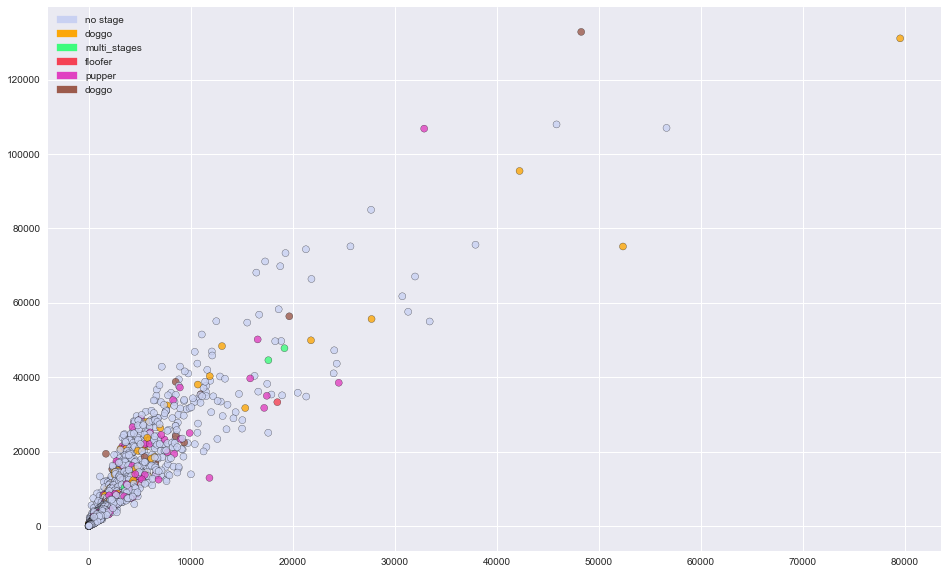

In [294]:
import matplotlib.patches as mpatches
plt.figure(figsize=(16,10))
c_map = {np.nan: '#c9d1f2', 'doggo': '#fca708', 'multi_stages': '#3dfc7d', 'floofer':'#f54254', 
         'pupper':'#e041c1', 'puppo':'#9c5b4c'}
plt.style.use('seaborn')
plt.scatter(x=df1.retweets, y=df1.favorites, c=[c_map[_] for _ in df1.dog_stage], edgecolors='black', alpha=0.8)
none_patch = mpatches.Patch(label='no stage', color='#c9d1f2')
doggo_patch = mpatches.Patch(label='doggo', color='#fca708')
duplicated_patch = mpatches.Patch(label='multi_stages', color='#3dfc7d')
floofer_patch = mpatches.Patch(label='floofer', color='#f54254')
pupper_patch = mpatches.Patch(label='pupper', color='#e041c1')
puppo_patch = mpatches.Patch(label='doggo', color='#9c5b4c')

plt.legend(handles=[none_patch, doggo_patch, duplicated_patch, floofer_patch, pupper_patch, puppo_patch]);
# as expected, favorites and retweets are positively related

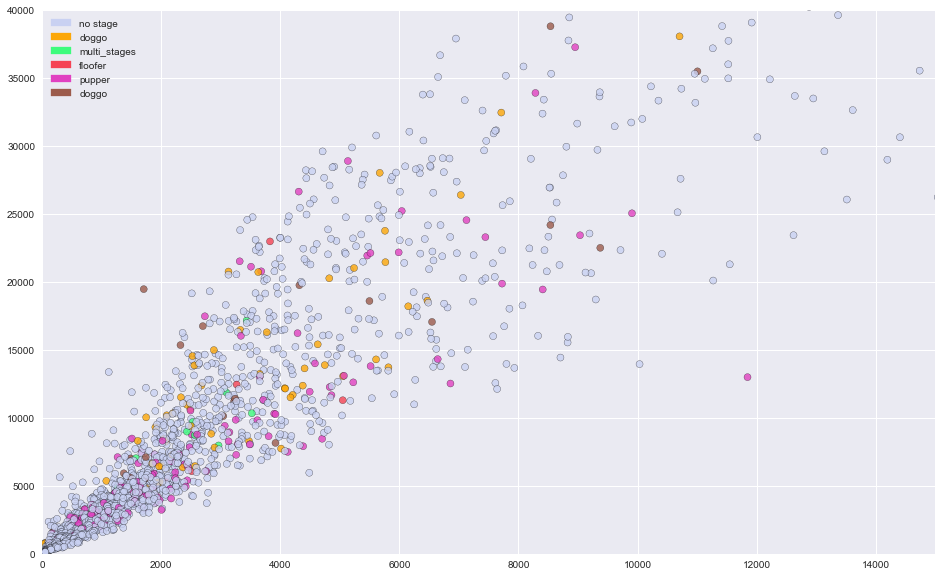

In [295]:
# zoom in to take a closer look at how different dog stages are distributed
plt.figure(figsize=(16,10))
plt.scatter(x=df1.retweets, y=df1.favorites, c=[c_map[_] for _ in df1.dog_stage], edgecolors='black', alpha=0.8)
plt.legend(handles=[none_patch, doggo_patch, duplicated_patch, floofer_patch, pupper_patch, puppo_patch])
plt.xlim(0,15000)
plt.ylim(0,40000);

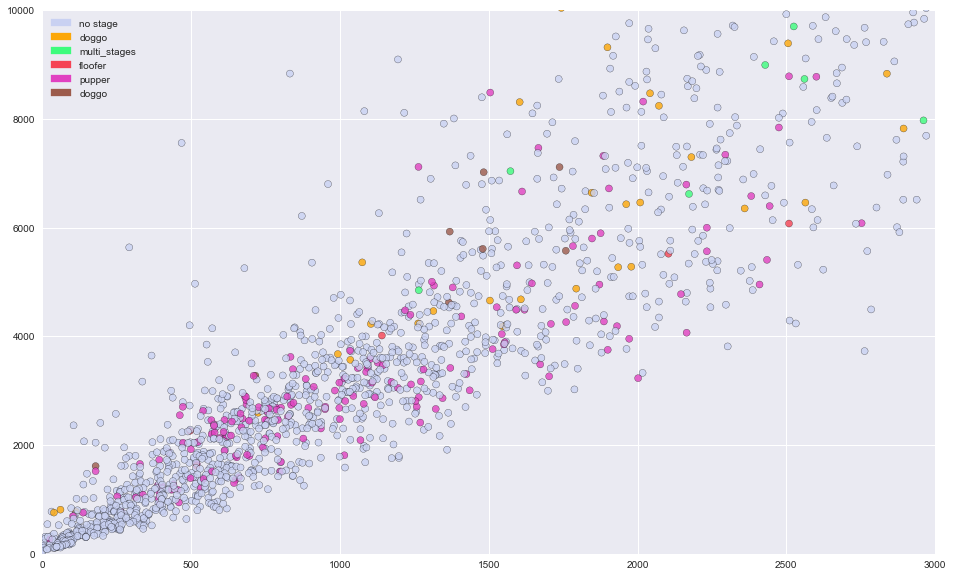

In [296]:
plt.figure(figsize=(16,10))
plt.scatter(x=df1.retweets, y=df1.favorites, c=[c_map[_] for _ in df1.dog_stage], edgecolors='black', alpha=0.8)
plt.legend(handles=[none_patch, doggo_patch, duplicated_patch, floofer_patch, pupper_patch, puppo_patch])
plt.xlim(0,3000)
plt.ylim(0,10000);

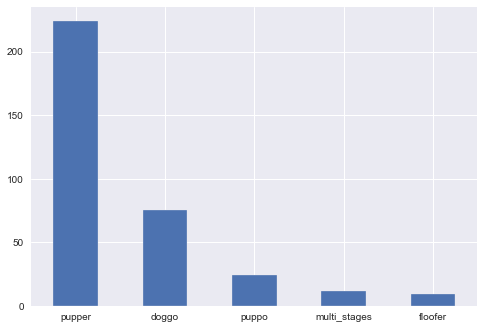

In [297]:
df1.dog_stage.value_counts().plot.bar()
plt.xticks(rotation=0);
# most of the data points have no dog_stage label, doggo and pupper are the majority among all those woth label
# it seems that doggo are more sparsely distributed and pupper more densely distributed from the graph above
# since pupper seems to be clustered in left lower part of the graph, 
# I guess pupper label might have some ability to predict how many favorites the post will get
# I'll testify this guess by using statistical model

In [301]:
import statsmodels.api as sm
df1['intercept']=1
df1[['doggo','multi_stages','floofer','pupper','puppo']]=pd.get_dummies(df1.dog_stage)
lm = sm.OLS(df1['favorites'], df1[['retweets','doggo','multi_stages','floofer','pupper','puppo','intercept']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              favorites   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1804.
Date:                Sun, 25 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:21:54   Log-Likelihood:                -21534.
No. Observations:                2171   AIC:                         4.308e+04
Df Residuals:                    2164   BIC:                         4.312e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
retweets         2.3641      0.023    101.950      0.000       2.319       2.410
doggo           67.2473    586.567      0.115      0.909   -1083.045    1217.540
multi_stages -1053.1566   1645.333     -0.640      0.522   -4279.755    2173.442
floofer        907.6321   1427.009      0.636      0.525   -1890.820    3706.084
pupper        -926.6878    348.497     -2.659      0.008   -1610.113    -243.263
puppo         3525.5324   1015.175      3.473      0.001    1534.712    5516.353
intercept     2292.6350    129.624     17.687      0.000    2038.434    2546.836
==============================================================================
Omnibus:                      546.204   Durbin-Watson:                   0.840
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36352.950
Skew:                          -0.048   Prob(JB):                         0.00
Kurtosis:                      23.047   Cond. No.                     8.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [302]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
y,X = dmatrices('favorites ~ retweets + doggo + pupper', df1, return_type='dataframe')
vif=pd.DataFrame()
vif['VIF factors']=[variance_inflation_factor(X.values,i) for i,k in enumerate(X)]
vif['Features']=X.columns

In [303]:
vif
# there aren't multicollinearity problem
# if I set P=0.05 as a thedshold, pupper does not predict how many favorites a post can get as I thought previously, 
# and retweets number is the only feature that predict favorite in a post

,VIF factors,Features
0,1.491808,Intercept
1,1.022282,retweets
2,1.026045,doggo
3,1.004278,pupper


### Relationship of retweet, favorites, dog_stage and the rating of the dog image

In [304]:
df2 = df[['favorites','retweets','dog_stage']]
df2=pd.concat([df2, rating], axis=1)
df2.rename(columns={0:'dog_ratings'},inplace=True)

In [305]:
df2['intercept']=1
df2[['doggo','multi_stages','floofer','pupper','puppo']]=pd.get_dummies(df2.dog_stage)

In [306]:
lm = sm.OLS(df2['dog_ratings'], df2[['intercept','favorites','retweets','doggo','multi_stages','floofer','pupper','puppo']])
result=lm.fit()
result.summary()
# from this analysis, no feature can predict dog_ratings

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dog_ratings   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.09017
Date:                Sun, 25 Oct 2020   Prob (F-statistic):              0.999
Time:                        11:22:35   Log-Likelihood:                -6221.3
No. Observations:                2171   AIC:                         1.246e+04
Df Residuals:                    2163   BIC:                         1.250e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.2252      0.120     10.216      0.000       0.990       1.460
favorites    -3.887e-06   1.86e-05     -0.209      0.834   -4.03e-05    3.26e-05
retweets      1.983e-05   4.83e-05      0.411      0.681   -7.49e-05       0.000
doggo           -0.0982      0.507     -0.194      0.846      -1.093       0.897
multi_stages    -0.0757      1.423     -0.053      0.958      -2.866       2.715
floofer         -0.1430      1.234     -0.116      0.908      -2.563       2.277
pupper          -0.1652      0.302     -0.547      0.584      -0.757       0.427
puppo           -0.0658      0.880     -0.075      0.940      -1.792       1.661
==============================================================================
Omnibus:                     6098.194   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        177029508.030
Skew:                          35.445   Prob(JB):                         0.00
Kurtosis:                    1400.141   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [307]:
# as I know from the previous analysis, retweets and favorites are highly correlated
# I'llhave to see their vif
y,X = dmatrices('dog_ratings ~ retweets + favorites + doggo + pupper', df2, return_type='dataframe')
vif=pd.DataFrame()
vif['VIF factors']=[variance_inflation_factor(X.values,i) for i,k in enumerate(X)]
vif['Features']=X.columns

In [308]:
vif
# to my surprise, no VIF is higher than 10, however, if I try to be stricter, 
# I can argue that VIF of retweets and favorites are more than 5, so I'll remove retweets to see how it works

,VIF factors,Features
0,1.713264,Intercept
1,5.980489,retweets
2,5.967343,favorites
3,1.026045,doggo
4,1.007871,pupper


In [309]:
lm = sm.OLS(df2['dog_ratings'], df2[['intercept','favorites','doggo','multi_stages','floofer','pupper','puppo']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dog_ratings   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.07714
Date:                Sun, 25 Oct 2020   Prob (F-statistic):              0.998
Time:                        11:22:46   Log-Likelihood:                -6221.4
No. Observations:                2171   AIC:                         1.246e+04
Df Residuals:                    2164   BIC:                         1.250e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        1.2180      0.119     10.267      0.000       0.985       1.451
favorites     3.056e-06   7.72e-06      0.396      0.692   -1.21e-05    1.82e-05
doggo           -0.0858      0.506     -0.169      0.865      -1.079       0.907
multi_stages    -0.0629      1.422     -0.044      0.965      -2.852       2.726
floofer         -0.1403      1.234     -0.114      0.909      -2.560       2.279
pupper          -0.1591      0.301     -0.528      0.598      -0.750       0.432
puppo           -0.0774      0.880     -0.088      0.930      -1.803       1.648
==============================================================================
Omnibus:                     6098.852   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        177161614.444
Skew:                          35.455   Prob(JB):                         0.00
Kurtosis:                    1400.662   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

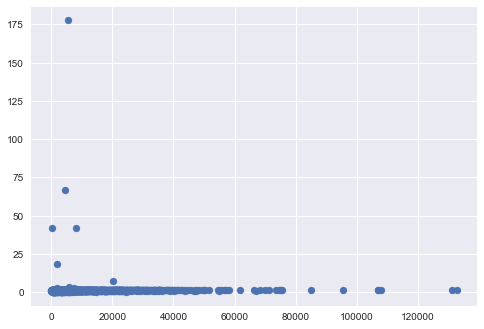

In [310]:
plt.scatter(x='favorites',y='dog_ratings',data=df2)
# perhaps it is the noises in dog_ratings that interfere with the model prediction

In [311]:
df3 = df2[df2['dog_ratings']<1.5].copy()
# remove outliers in dog_ratings

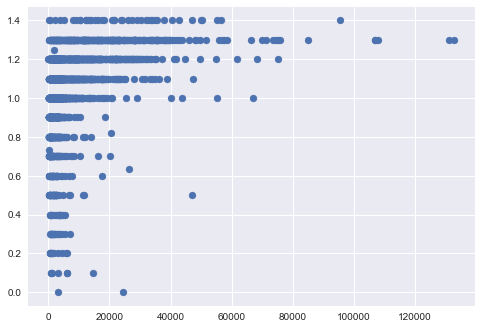

In [312]:
plt.scatter(x='favorites',y='dog_ratings',data=df3)

In [313]:
# it donesn't look like using linear model is a good choice, but I'll try it out
lm = sm.OLS(df3['dog_ratings'], df3[['intercept','favorites','doggo','multi_stages','floofer','pupper','puppo']])
result=lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            dog_ratings   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     66.18
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.06e-75
Time:                        11:22:53   Log-Likelihood:                 380.97
No. Observations:                2160   AIC:                            -747.9
Df Residuals:                    2153   BIC:                            -708.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept        0.9931      0.006    174.862      0.000       0.982       1.004
favorites     6.863e-06   3.69e-07     18.619      0.000    6.14e-06    7.59e-06
doggo            0.0731      0.024      3.024      0.003       0.026       0.120
multi_stages     0.1199      0.068      1.766      0.078      -0.013       0.253
floofer          0.0257      0.059      0.436      0.663      -0.090       0.141
pupper           0.0312      0.014      2.166      0.030       0.003       0.060
puppo            0.0684      0.042      1.630      0.103      -0.014       0.151
==============================================================================
Omnibus:                      758.311   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2697.019
Skew:                          -1.734   Prob(JB):                         0.00
Kurtosis:                       7.235   Cond. No.                     2.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [314]:
# it's better in terms of predicting dog_ratings compared with the previous one with outliers inside the dataframe.
# I noticed that R-squared is only 0.156 meaning only 15% of the data points can be explained by the linear relationship.
# So I'll say none of these features really has a good linear relationship with the ratings that other people gave

### Relation between dog prediction and favorites

In [315]:
df.groupby('p1_dog').mean()['favorites'].round(2)

p1_dog
False    7773.68
True     9293.82
Name: favorites, dtype: float64

In [316]:
df.groupby('p2_dog').mean()['favorites'].round(2)

p2_dog
False    7636.14
True     9320.32
Name: favorites, dtype: float64

In [317]:
df.groupby('p3_dog').mean()['favorites'].round(2)

p3_dog
False    8078.43
True     9210.86
Name: favorites, dtype: float64

In [318]:
# When looking at the three tables, there are no big difference in terms of favorites counts.
# Generally speaking, there are slightly more favorites when the models predict it is a dog in the photo.

In [319]:
dog_and_favorites = df.groupby(['p1_dog','p2_dog','p3_dog']).mean()['favorites'].round(2)
pd.DataFrame(dog_and_favorites)

favorites
p1_dog p2_dog p3_dog           
False  False  False     7048.88
              True      8670.13
       True   False    10087.77
              True      8271.83
True   False  False     6642.21
              True      9512.72
       True   False     9970.65
              True      9291.56

In [320]:
# As they are put together, the results become more inconsistent.
# I expected photo which all three models predict to be not a dog might have fewer mean favorites counts, 
# but it actually has the second fewest favorites counts instead of the fewest.
# The group where all models predict to be a dog doesn't have the highest favorites counts as expected.
# What is worth noting is that in the group where p1/p3 models predict to be not a dog and p2 predict to be a dog 
# has the highest favorites counts among all. I guess there might be outliers in this group.

<AxesSubplot:>

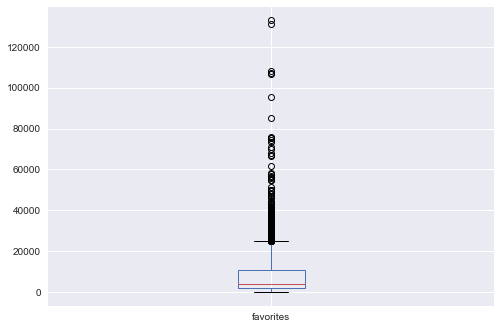

In [346]:
df.favorites.plot.box()

In [357]:
upper = df.favorites.quantile(0.75)
lower = df.favorites.quantile(0.25)
IQR = upper -lower
upper_boundary= upper + 1.5*IQR
upper_boundary

24870.25

In [358]:
fav_outliers= df[(df.favorites > upper_boundary)]

In [359]:
mask1= df.p1_dog==False
mask2= df.p2_dog==True
mask3= df.p3_dog==False
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.15384615384615385

In [360]:
mask1= df.p1_dog==True
mask2= df.p2_dog==True
mask3= df.p3_dog==False
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.08275862068965517

In [361]:
mask1= df.p1_dog==True
mask2= df.p2_dog==True
mask3= df.p3_dog==True
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.08811305070656691

In [362]:
mask1= df.p1_dog==True
mask2= df.p2_dog==False
mask3= df.p3_dog==True
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.07058823529411765

In [363]:
mask1= df.p1_dog==True
mask2= df.p2_dog==False
mask3= df.p3_dog==False
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.06976744186046512

In [364]:
mask1= df.p1_dog==False
mask2= df.p2_dog==True
mask3= df.p3_dog==True
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.06315789473684211

In [365]:
mask1= df.p1_dog==False
mask2= df.p2_dog==False
mask3= df.p3_dog==True
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.06451612903225806

In [366]:
mask1= df.p1_dog==False
mask2= df.p2_dog==False
mask3= df.p3_dog==False
mask=mask1 & mask2 & mask3
fav_outliers_pred = df[(df.favorites > upper_boundary)& mask]
fav_outliers_pred.favorites.count()/df[mask].favorites.count()

0.06818181818181818

In [332]:
# it looks like my assunption is right that p1:False/p2:True/p3:False group has around two times more outliers than other group
# and that can explain why it has abnormally high amount of mean favorites counts